

# Project: No-show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil.  A number of characteristics about the patient are included in each record. ex.gender, age, neighbourhood and medical history.

In the following analysis, we would like to find out the answers of three questions below:


## Questions
### Q1 Does earlier appointment make people show up on time?

### Q2 Which gender tend to arrange appointments earlier?

### Q3 Does SMS notification decrease the amout of absences?



## Import all the necessary libaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

### Now that my data is loaded, I'll make the following changes:
    (1) Drop out columns that will not be used for our analysis (ex.id)
    (2) change time data to datetime64 data type so we can use them to do some calculation.

#### Drop out extraneous columns

In [6]:
df.drop(['PatientId', 'AppointmentID'],axis=1,inplace=True)

#### Change data types

In [7]:
def change_dtype():
    """
    ScheduleDay and AppointmentDay columns are changed into datetime64 data type
    """
    need_change = df.loc[:,('ScheduledDay','AppointmentDay')]
    for x in need_change.columns:
        if (df[x].dtype != np.datetime64):
              df[x] = pd.to_datetime(df[x])
        else:
              continue
change_dtype()

In [8]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 Does earlier appointment make people show up on time?

#### Cut off the time part to only calculate the general number of days

In [9]:
df['ScheduledDay'] = df.ScheduledDay.dt.normalize()

In [10]:
df['days_before'] = df['AppointmentDay'] - df['ScheduledDay']

In [11]:
df['days_before'] = df['days_before'].dt.days

#### See how the data distribute in days_before columnm

In [12]:
df['days_before'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_before, dtype: float64

#### Draw a bar plot 

#### Cut them into four groups according to the quartile days

In [13]:
bin_names = ['same day','1-4days','5-15days','more than 15']
bin_edges = [-0.5,0,4,15,179]
df['days_before_1'] = pd.cut(df['days_before'],bin_edges,labels=bin_names,include_lowest=False)

In [14]:
bin_count = df.groupby(['No-show','days_before_1'])['Gender'].count()
no_show_count = bin_count['Yes']
show_count = bin_count['No']

([<matplotlib.axis.XTick at 0x11490c4e0>,
 <a list of 4 Text xticklabel objects>)

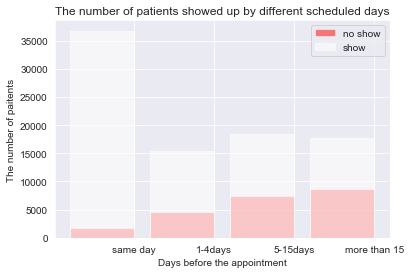

In [15]:
x = np.arange(4)
no_show_bars = plt.bar(x, no_show_count, color ='r',alpha=0.5, label='no show')
show_bars = plt.bar(x, show_count, color = 'w',alpha=0.6,label='show')
plt.legend()
plt.title('The number of patients showed up by different scheduled days')
plt.xlabel('Days before the appointment')
plt.ylabel('The number of paitents')
plt.xticks(x+0.4, bin_names)


##### We can see from the chart that people who make apoointments earlier are more likely to miss their appoinment.
##### On the other hand, people who arranged it on the same day are more likely to show up on time.

### Q2 Which gender tend to arrange appointments earlier?

#### Seperate records into 2 groups (same, arranged in advance)

In [16]:
bin_names = ['same day','arranged in advance']
bin_edges = [-0.5,0,179]
df['days_before_2'] = pd.cut(df['days_before'], bin_edges, labels=bin_names, include_lowest=False)

#### Group them by gender

In [17]:
bin_count = df.groupby(['Gender','days_before_2']).count()
f_bin = bin_count.query('Gender == "F"')
f_bin['Age']

Gender  days_before_2      
F       same day               23767
        arranged in advance    48070
Name: Age, dtype: int64

In [18]:
m_bin = bin_count.query('Gender == "M"')
m_bin['Age']

Gender  days_before_2      
M       same day               14796
        arranged in advance    23889
Name: Age, dtype: int64

#### Calculate the attendance percentage in each gender

In [19]:
female_total = df.query('Gender == "F"')['Gender'].count()
male_total = df.query('Gender == "M"')['Gender'].count()

In [20]:
fbin_percent = f_bin['Age'] / female_total
mbin_percent = m_bin['Age'] / male_total
fbin_percent

Gender  days_before_2      
F       same day               0.330832
        arranged in advance    0.669126
Name: Age, dtype: float64

In [21]:
mbin_percent

Gender  days_before_2      
M       same day               0.382454
        arranged in advance    0.617494
Name: Age, dtype: float64

#### Draw a bar plot to visualize the difference

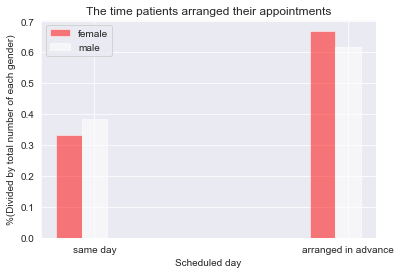

In [22]:
x = np.arange(2)
no_show_bars = plt.bar(x, fbin_percent, width=0.1, color ='r',alpha=0.5, label='female')
show_bars = plt.bar(x+0.1, mbin_percent, width=0.1, color = 'w',alpha=0.6,label='male')
plt.legend()
plt.title('The time patients arranged their appointments')
plt.xlabel('Scheduled day')
plt.ylabel('%(Divided by total number of each gender)')
plt.xticks(x+0.1, bin_names)
plt.legend(loc='best')


##### The bar chart shows that higher percentage of females arrange their appointment earlier(38.25%) ,
##### while men tend to schedule it on the same day(33.08%).


#### Find out what factor may also affect patients' attendance

#### Change categorical data(No-show) into numerical data

In [23]:
df['No-show'] = df['No-show'].map(dict(Yes=1, No=0))

In [24]:
co = df.corr()
co

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_before
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319,0.034820
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135,-0.030421
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701,-0.017215
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180,-0.027188
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196,-0.038519
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076,-0.019843
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431,0.398145
No-show,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000,0.186231
days_before,0.034820,-0.030421,-0.017215,-0.027188,-0.038519,-0.019843,0.398145,0.186231,1.000000


#### Draw a heat map to see the correlation of different variables

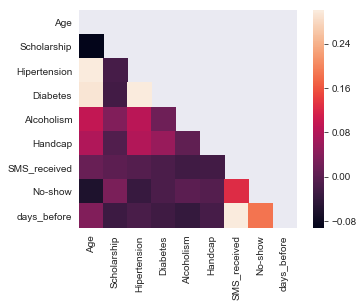

In [25]:
mask = np.zeros_like(co)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(co, mask=mask, vmax=.3, square=True)


##### We can see from the heatmap that age is highly related to Diabetes and Hipertension.
##### Also, people who have Hipertension are more likely to have Diabetes.

### Q3 Does SMS notification decrease the absences?

#### Select the patients who received the SMS message and came to the appointment

In [26]:
SMS_show = df.groupby(['SMS_received','No-show'])['Age'].count()
received = SMS_show[1]
received

No-show
0    25698
1     9784
Name: Age, dtype: int64

#### Draw a pie chart 

Text(0.5, 1.0, 'The attendance rate of patients who have received SMS message')

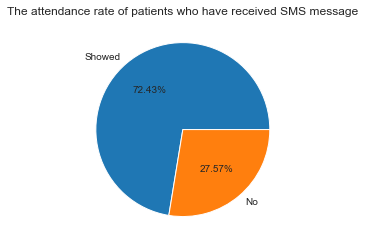

In [30]:
labels = ['Showed','No']
plt.pie(received, labels=labels, autopct='%2.2f%%')
plt.title('The attendance rate of patients who have received SMS message')


##### According to the pie chart, only 27.57% of people who received the notification and didn't go to see the doctor.
##### Over 70% of people went to the appointment after they received the SMS message.

<a id='conclusions'></a>
## Conclusions
### Results: our data suggests that
    
    (1)The earlier people make their appointments the smaller the chance they attend. 
    (2)Compared to males, more females like to arrange their appointments in advance.
    (3)SMS messages are likely to decrease the absence rate.
    
### Limitation: There are a couple of limitations with our data:
    (1) A big part of our data is patients' medical condition which does not seem to have evident relation with               attendance.
    (2) Most of the variables are categorical, and they don't show strong correlation.
    (3) Without detailed information, the insight we found in the SMS question is a bit intuitive.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])